In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score
import warnings
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE , RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
warnings.filterwarnings('ignore')
from sklearn.manifold import TSNE
from flask import Flask, request, jsonify
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss


data = pd.read_csv(r"Z:\Documents\split-20231109T134906Z-001\split\train.csv")
data_val = pd.read_csv(r"Z:\Documents\split-20231109T134906Z-001\split\val.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

In [3]:
distribution = data['Class'].value_counts(normalize=True) 
print("Distribution of values in column Class ")
print(distribution*100)

Distribution of values in column Class 
0    99.821516
1     0.178484
Name: Class, dtype: float64


no nulls

In [4]:
data.isnull().sum().sum()


0

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,...,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000
mean,94966.107886,-0.001070,-0.000904,-0.002722,-0.002603,0.000151,0.000779,-0.000811,-0.002327,-0.000622,...,0.000957,0.000056,0.000475,-0.000894,-0.000593,-0.000738,0.000404,0.000422,88.511723,0.001785
std,47464.723773,1.958944,1.650481,1.521820,1.416490,1.394123,1.338331,1.260122,1.208709,1.098393,...,0.743974,0.726681,0.620647,0.605148,0.521128,0.481720,0.404540,0.314973,256.737144,0.042210
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54348.000000,-0.922071,-0.599127,-0.896376,-0.848978,-0.691840,-0.768986,-0.554440,-0.209596,-0.642036,...,-0.228068,-0.542831,-0.161063,-0.354552,-0.318057,-0.327631,-0.070719,-0.053019,5.637500,0.000000
50%,84923.500000,0.016603,0.065839,0.177007,-0.020895,-0.054185,-0.274228,0.040417,0.021461,-0.051777,...,-0.029547,0.006488,-0.010688,0.040433,0.016916,-0.051262,0.001520,0.011216,22.020000,0.000000
75%,139404.000000,1.316250,0.802518,1.028302,0.738812,0.612154,0.400359,0.569221,0.326026,0.595095,...,0.186681,0.528971,0.147814,0.437888,0.350188,0.240718,0.091713,0.078480,77.650000,0.000000
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,1.000000


In [6]:
data_val.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,...,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000,56960.000000
mean,94618.777633,0.008241,0.009452,0.004196,-0.001807,0.003572,-0.004865,-0.007557,0.001075,0.003971,...,-0.001866,0.001418,-0.004535,0.003388,0.002069,0.000141,0.000973,-0.002645,86.702456,0.001580
std,47567.353857,1.928594,1.610555,1.493492,1.414919,1.350720,1.325396,1.183066,1.205519,1.094351,...,0.728364,0.726550,0.626531,0.606313,0.518774,0.482796,0.389882,0.306264,232.028111,0.039719
min,4.000000,-35.274010,-44.639245,-31.813586,-5.416315,-29.730600,-21.248752,-31.197329,-50.943369,-9.462573,...,-22.665685,-8.887017,-44.807735,-2.822684,-10.295397,-2.241620,-8.260909,-8.656570,0.000000,0.000000
25%,53925.250000,-0.916434,-0.600371,-0.887902,-0.856074,-0.688001,-0.773573,-0.557624,-0.208778,-0.639260,...,-0.228330,-0.541710,-0.162602,-0.352806,-0.315141,-0.327057,-0.071073,-0.053091,5.550000,0.000000
50%,84559.000000,0.026847,0.069277,0.184420,-0.030007,-0.053001,-0.283597,0.037480,0.023736,-0.050270,...,-0.028119,0.009966,-0.013068,0.042979,0.017146,-0.055370,0.000981,0.011129,21.875000,0.000000
75%,139385.250000,1.318466,0.811323,1.024113,0.747237,0.614933,0.390776,0.568802,0.331706,0.602992,...,0.187589,0.531348,0.146956,0.445147,0.352085,0.240541,0.089555,0.077585,76.000000,0.000000
max,172788.000000,2.418802,17.418649,4.101716,12.699542,31.457046,21.307738,31.527244,20.007208,10.370658,...,27.202839,7.220158,18.364472,3.951679,5.473885,2.991210,10.507884,15.866721,11789.840000,1.000000


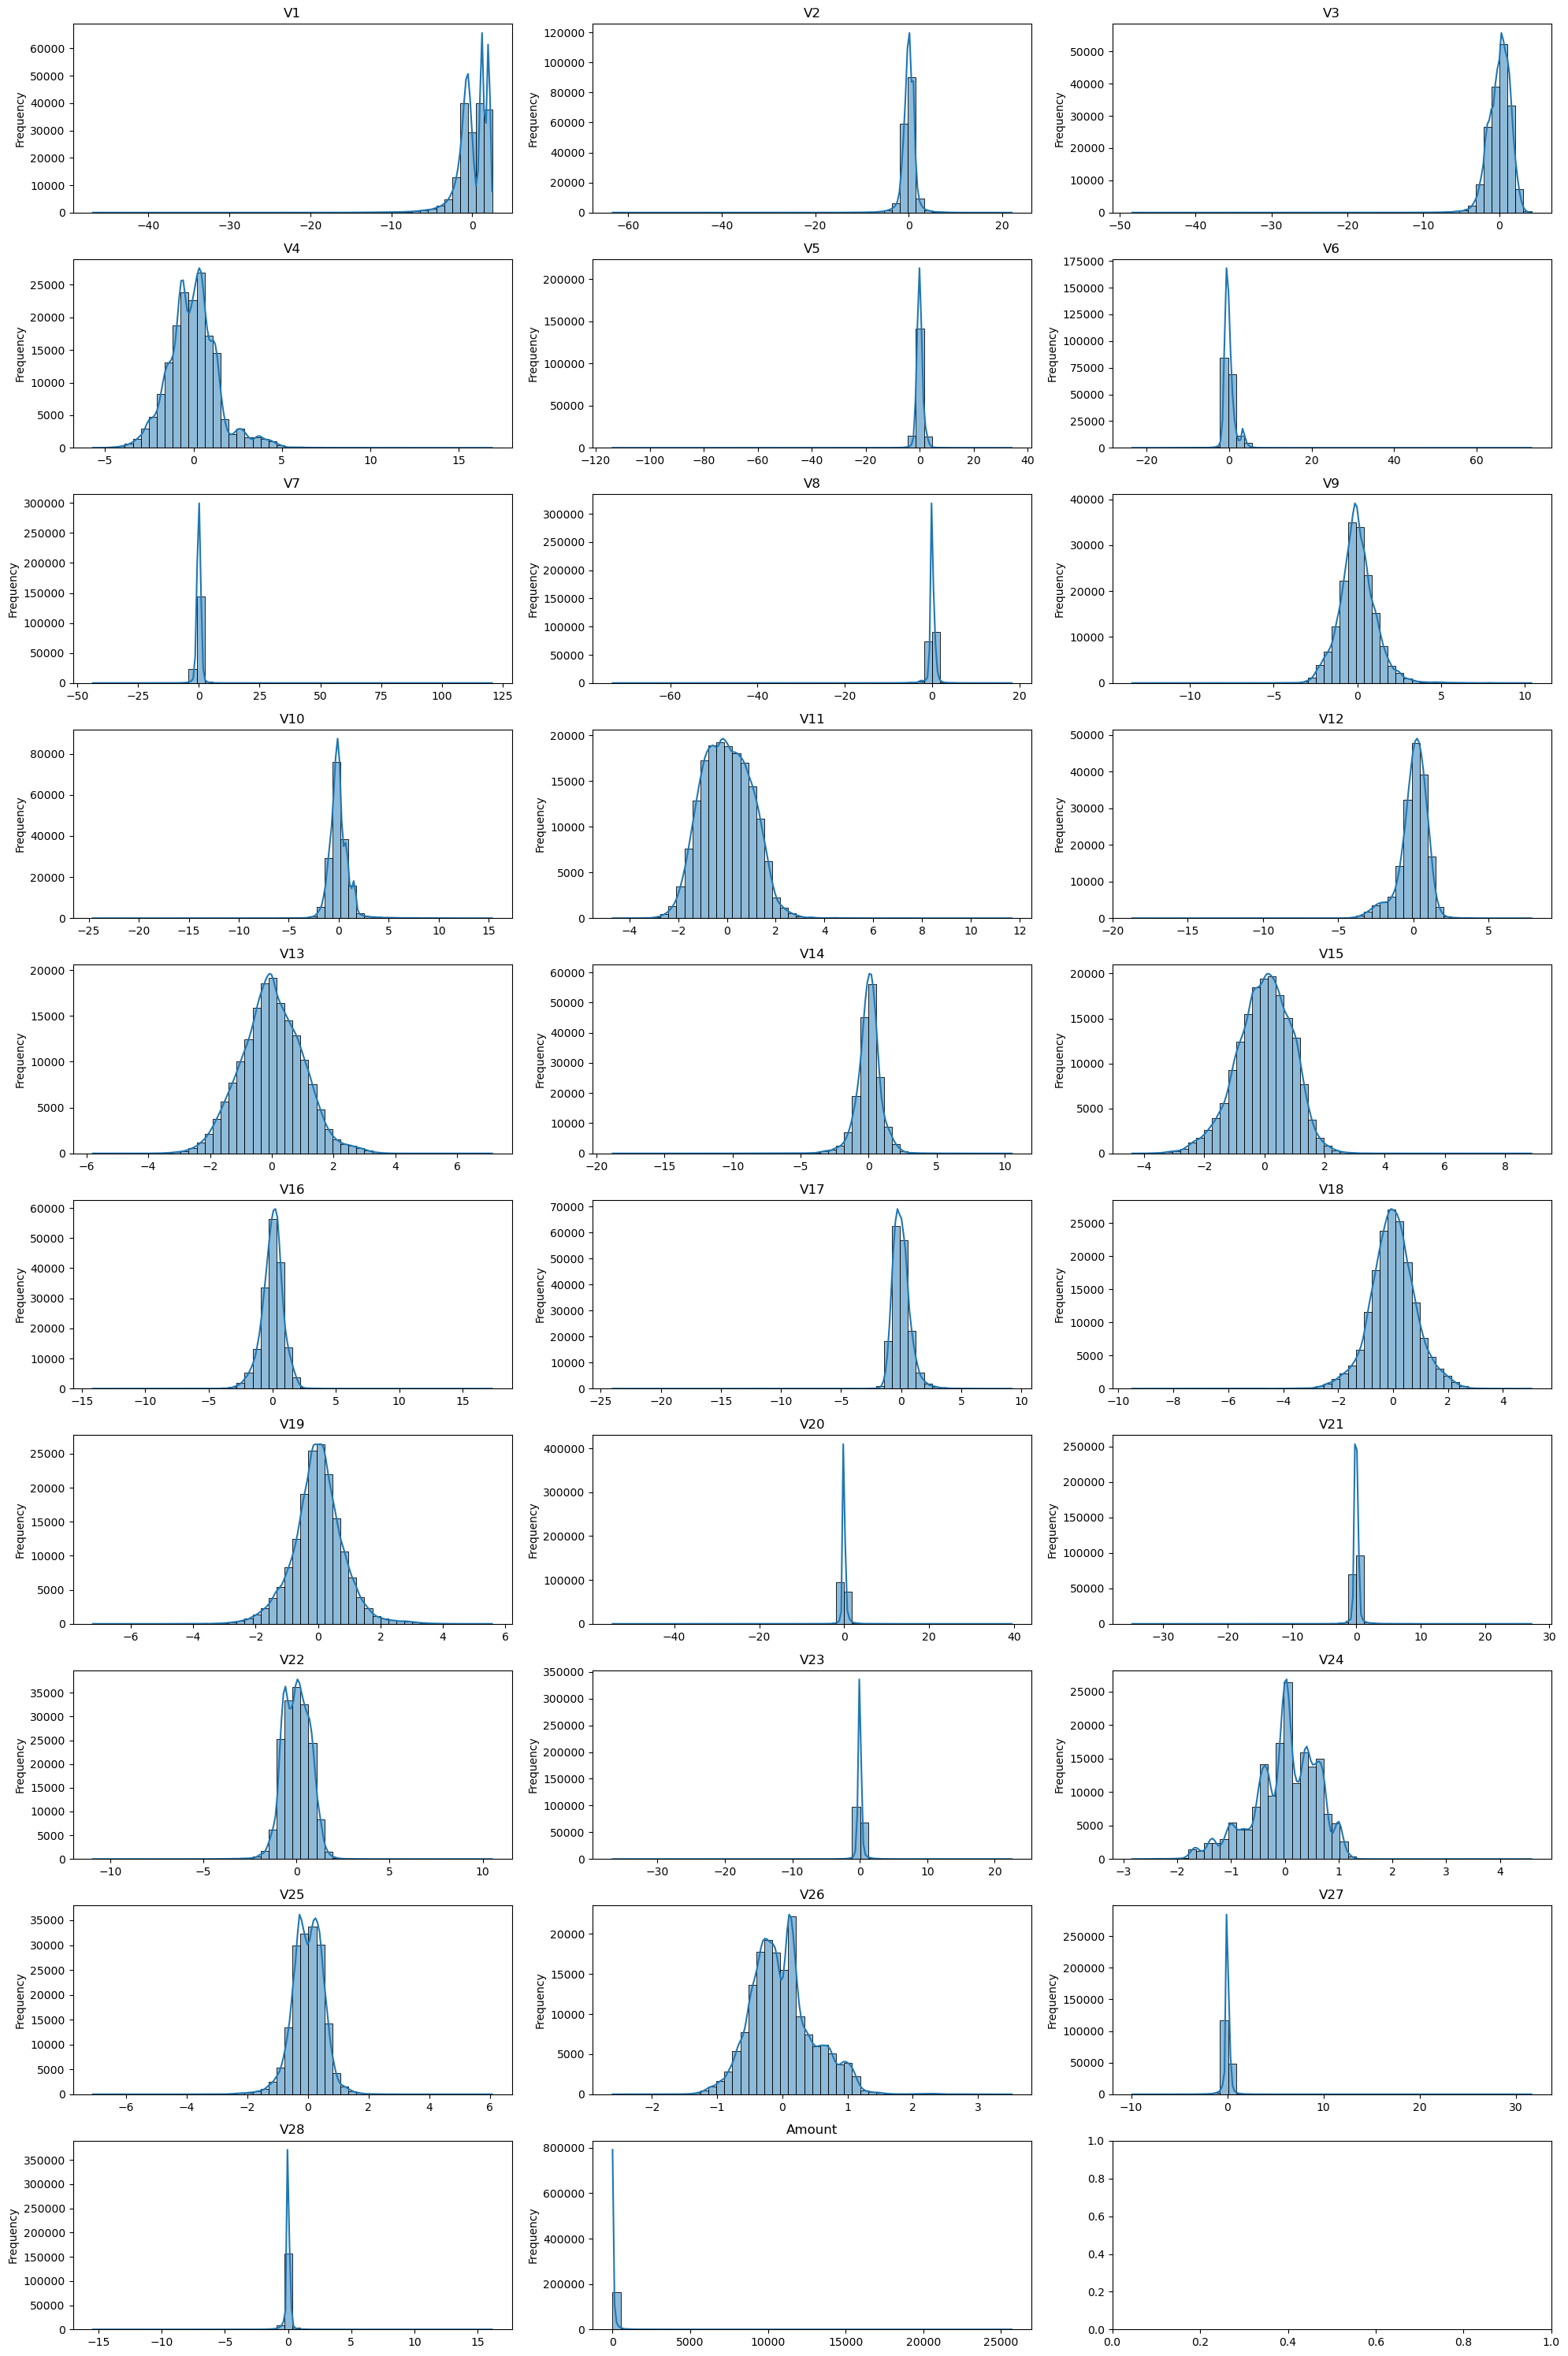

In [7]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 30))

axes = axes.flatten()

for i, col in enumerate(data.columns[1:-1]):
    sns.histplot(data[col], kde=True, bins=50, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### V1, V2, V3, ..., V28:

-Most of these features are already centered around zero and have varying distributions, some being more normally distributed while others have long tails or skewed distributions.


### Amount:

-The Amount feature appears to be heavily skewed with a long tail. This kind of distribution can benefit from a Log Transformation to compress the range and stabilize the variance.
After applying the log transformation, you might want to follow it with a Standard Scaler to ensure it has a mean of zero and a standard deviation of one.


In [8]:
from sklearn.preprocessing import RobustScaler, StandardScaler
import numpy as np

# Log transform 'Amount' column
data['Amount'] = np.log1p(data['Amount'])
data_val['Amount'] = np.log1p(data_val['Amount'])


standard_scaler = StandardScaler()
data[['Amount']] = standard_scaler.fit_transform(data[['Amount']])
data_val[['Amount']] = standard_scaler.transform(data_val[['Amount']])

# Fit and transform 'Time' using StandardScaler on training data
data[['Time']] = standard_scaler.fit_transform(data[['Time']])
data_val[['Time']] = standard_scaler.transform(data_val[['Time']])  # Using the same scaler as on training data


In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1.708840e+05,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,...,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,1.708840e+05,170884.000000
mean,1.018720e-16,-0.001070,-0.000904,-0.002722,-0.002603,0.000151,0.000779,-0.000811,-0.002327,-0.000622,...,0.000957,0.000056,0.000475,-0.000894,-0.000593,-0.000738,0.000404,0.000422,-1.894404e-16,0.001785
std,1.000003e+00,1.958944,1.650481,1.521820,1.416490,1.394123,1.338331,1.260122,1.208709,1.098393,...,0.743974,0.726681,0.620647,0.605148,0.521128,0.481720,0.404540,0.314973,1.000003e+00,0.042210
min,-2.000778e+00,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,-1.905222e+00,0.000000
25%,-8.557561e-01,-0.922071,-0.599127,-0.896376,-0.848978,-0.691840,-0.768986,-0.554440,-0.209596,-0.642036,...,-0.228068,-0.542831,-0.161063,-0.354552,-0.318057,-0.327631,-0.070719,-0.053019,-7.620986e-01,0.000000
50%,-2.115811e-01,0.016603,0.065839,0.177007,-0.020895,-0.054185,-0.274228,0.040417,0.021461,-0.051777,...,-0.029547,0.006488,-0.010688,0.040433,0.016916,-0.051262,0.001520,0.011216,-1.100541e-02,0.000000
75%,9.362326e-01,1.316250,0.802518,1.028302,0.738812,0.612154,0.400359,0.569221,0.326026,0.595095,...,0.186681,0.528971,0.147814,0.437888,0.350188,0.240718,0.091713,0.078480,7.310381e-01,0.000000
max,1.639662e+00,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,4.227283e+00,1.000000


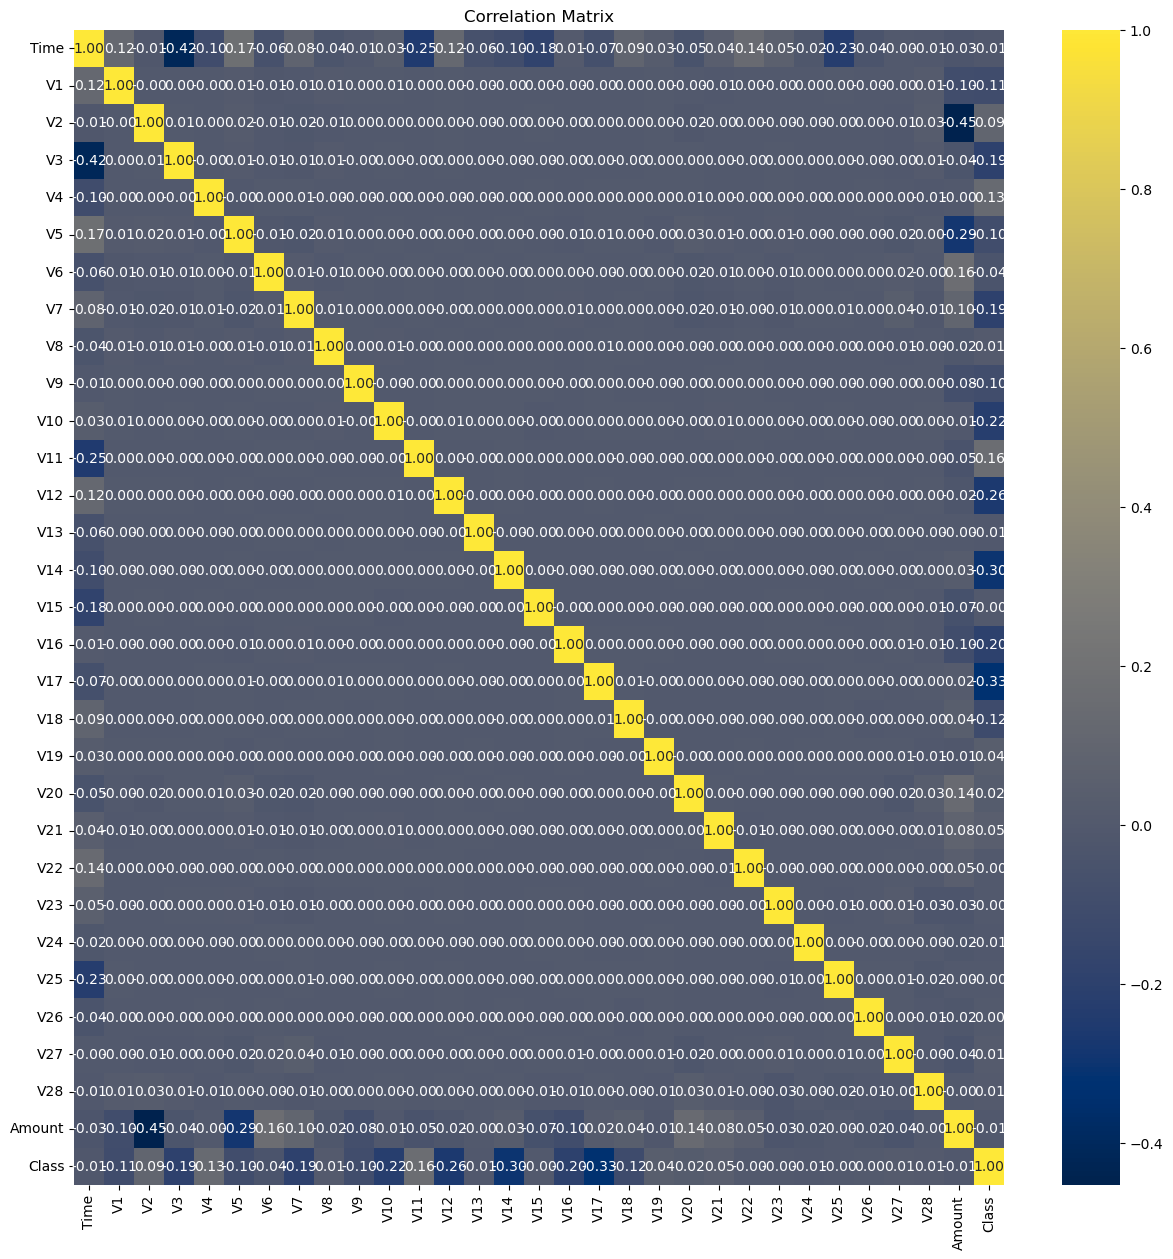

In [10]:


correlation_mat = data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_mat, annot=True, cmap="cividis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

From thr above we conclude that

1) the correlation matrix showed that there is no any linear relation between any two column so we can not drop any column

#### note : this correlation matrix is misleading due to high imbalance 

In [11]:
print('No Frauds', (data['Class'].value_counts()[0]), ' of the dataset')
print('Frauds', (data['Class'].value_counts()[1]), ' of the dataset')

No Frauds 170579  of the dataset
Frauds 305  of the dataset


In [12]:
data = data.sample(frac=1)


fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0][:600]

nd_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
nd_df = nd_df.sample(frac=1, random_state=42)

print('No Frauds', (nd_df['Class'].value_counts()[0]), ' of the dataset')
print('Frauds', (nd_df['Class'].value_counts()[1]), ' of the dataset')

No Frauds 600  of the dataset
Frauds 305  of the dataset


### Use tsne to visualize the data , tsne is dimensionality reduction algo

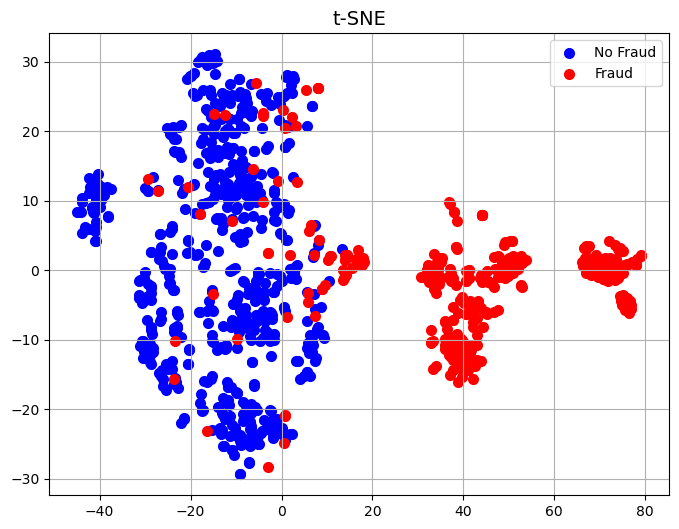

In [13]:



X = nd_df.drop('Class', axis=1)
y = nd_df['Class']


X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
ax1.scatter(X_reduced_tsne[y == 0, 0], X_reduced_tsne[y == 0, 1], c='b', cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[y == 1, 0], X_reduced_tsne[y == 1, 1], c='r', cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend()
plt.show()


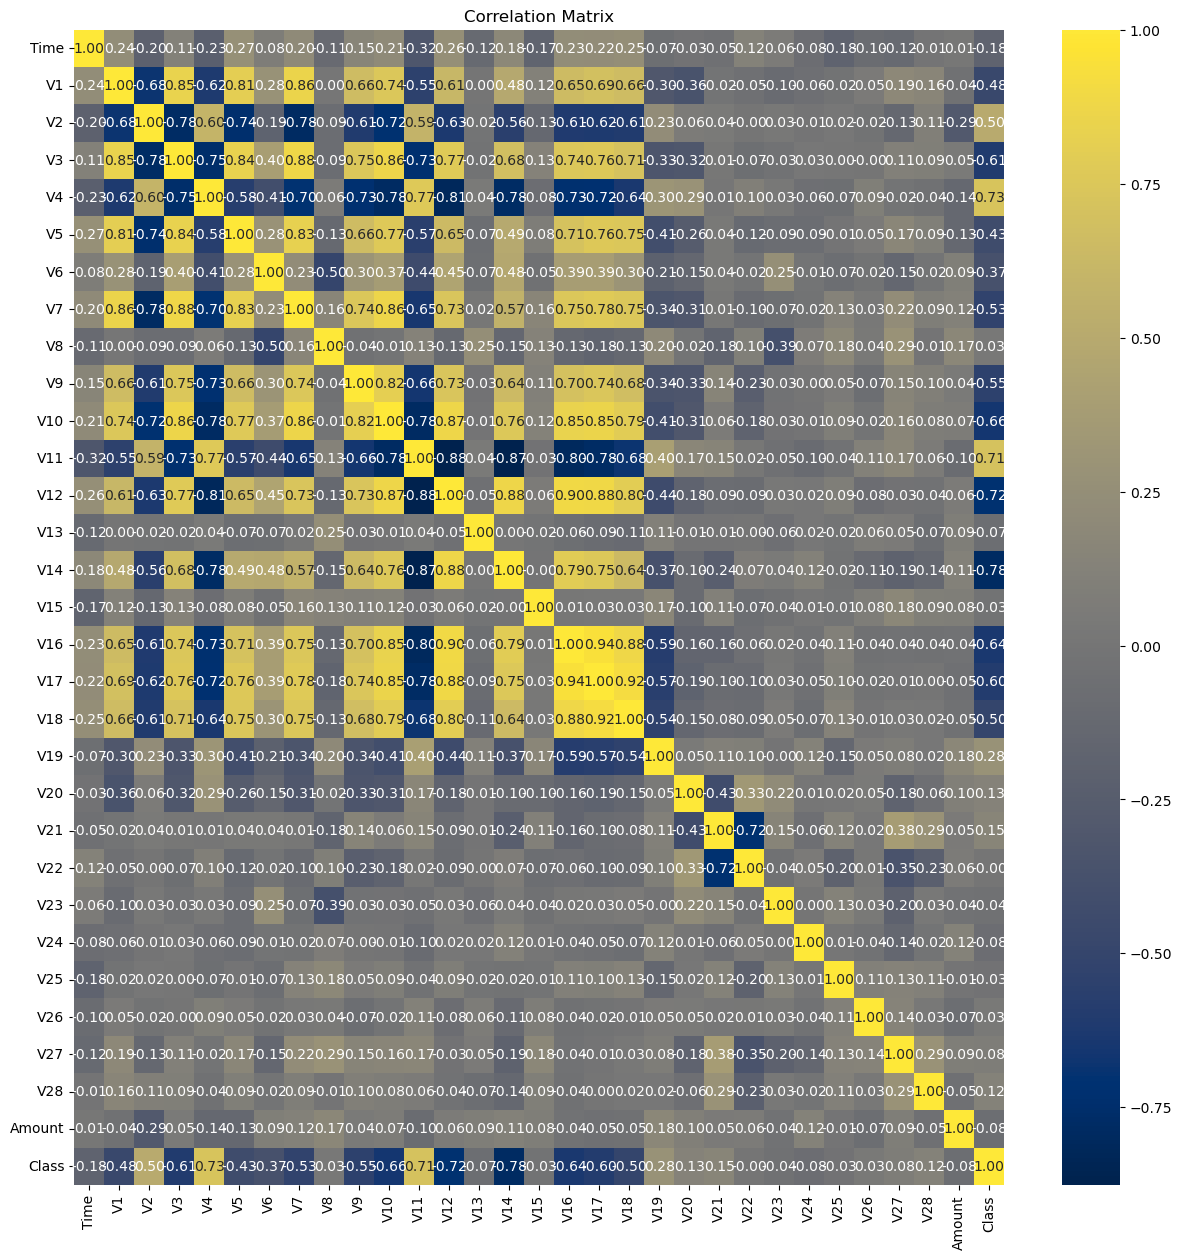

In [14]:

correlation_mat = nd_df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_mat, annot=True, cmap="cividis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [15]:


X_train = data.drop(columns=['Class'])
y_train = data['Class']


X_test=data_val.drop(columns=['Class'])
y_test=data_val['Class']



logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)


logistic_y_scores = logistic_model.predict_proba(X_test)[:, 1]


logistic_precision, logistic_recall, _ = precision_recall_curve(y_test, logistic_y_scores)
logistic_pr_auc = auc(logistic_recall, logistic_precision)
logistic_avg_precision = average_precision_score(y_test, logistic_y_scores)

# default max depth is none
# means that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
n_estimators: 100
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


rf_y_scores = rf_model.predict_proba(X_test)[:, 1]


rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_y_scores)
rf_pr_auc = auc(rf_recall, rf_precision)
rf_avg_precision = average_precision_score(y_test, rf_y_scores)


print("Logistic Regression Results")
print(f'PR-AUC: {logistic_pr_auc}')
print(f'Average Precision Score: {logistic_avg_precision}')


print("Random Forest Results")
print(f'PR-AUC: {rf_pr_auc}')
print(f'Average Precision Score: {rf_avg_precision}')

logistic_y_pred = logistic_model.predict(X_test)
logistic_conf_matrix = confusion_matrix(y_test, logistic_y_pred)
logistic_f1 = f1_score(y_test, logistic_y_pred)

print("Logistic Regression Confusion Matrix:")
print(logistic_conf_matrix)
print("Logistic Regression F1-score:", logistic_f1)

rf_y_pred = rf_model.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)
print("Random Forest F1-score:", rf_f1)

Logistic Regression Results
PR-AUC: 0.7678566138568781
Average Precision Score: 0.7689783621831482
Random Forest Results
PR-AUC: 0.8592954413237677
Average Precision Score: 0.8547733903651502
Logistic Regression Confusion Matrix:
[[56864     6]
 [   32    58]]
Logistic Regression F1-score: 0.7532467532467533
Random Forest Confusion Matrix:
[[56867     3]
 [   22    68]]
Random Forest F1-score: 0.8447204968944099


##### When to Use PR-AUC:
Imbalanced Datasets: PR-AUC is particularly useful for imbalanced datasets where the positive class is much rarer than the negative class.

#### The logistic baseline model has 75 f1 score and this will be our base accuracy for the upcoming methods


#### The RF baseline model has 85 f1 score and this will be our base accuracy 

In [16]:
X_train = data.drop(columns=['Class'])
y_train = data['Class']


undersampler = RandomUnderSampler(sampling_strategy={0: 3 * 305},random_state=42)

X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

X_test=data_val.drop(columns=['Class'])
y_test=data_val['Class']


logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_resampled, y_resampled)


logistic_y_scores = logistic_model.predict_proba(X_test)[:, 1]



logistic_precision, logistic_recall, _ = precision_recall_curve(y_test, logistic_y_pred)
logistic_pr_auc = auc(logistic_recall, logistic_precision)
logistic_avg_precision = average_precision_score(y_test, logistic_y_pred)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)


rf_y_scores = rf_model.predict_proba(X_test)[:, 1]


rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_y_scores)
rf_pr_auc = auc(rf_recall, rf_precision)
rf_avg_precision = average_precision_score(y_test, rf_y_scores)


print("Logistic Regression Results")
print(f'PR-AUC: {logistic_pr_auc}')
print(f'Average Precision Score: {logistic_avg_precision}')


print("Random Forest Results")
print(f'PR-AUC: {rf_pr_auc}')
print(f'Average Precision Score: {rf_avg_precision}')

logistic_y_pred = logistic_model.predict(X_test)
logistic_conf_matrix = confusion_matrix(y_test, logistic_y_pred)
logistic_f1 = f1_score(y_test, logistic_y_pred)

print("Logistic Regression Confusion Matrix:")
print(logistic_conf_matrix)
print("Logistic Regression F1-score:", logistic_f1)

rf_y_pred = rf_model.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)
print("Random Forest F1-score:", rf_f1)

Logistic Regression Results
PR-AUC: 0.7756281210986268
Average Precision Score: 0.5845895755305868
Random Forest Results
PR-AUC: 0.7965423501635509
Average Precision Score: 0.7626002295744003
Logistic Regression Confusion Matrix:
[[56183   687]
 [   11    79]]
Logistic Regression F1-score: 0.18457943925233647
Random Forest Confusion Matrix:
[[56723   147]
 [   12    78]]
Random Forest F1-score: 0.49523809523809526



## Bad-classification-performance-of-logistic-regression


### The fundamental assumption made by statistical machine learning methods (including logistic regression) is that the distribution of data in the test set matches the distribution of data in the training set. random forest ia a miscalibrated model . later we will try to calibrate our model (logistic reg)

In [17]:
X_train = data.drop(columns=['Class'])
y_train = data['Class']


oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_resampled, y_resampled)


logistic_y_scores = logistic_model.predict_proba(X_test)[:, 1]



logistic_precision, logistic_recall, _ = precision_recall_curve(y_test, logistic_y_scores)
logistic_pr_auc = auc(logistic_recall, logistic_precision)
logistic_avg_precision = average_precision_score(y_test, logistic_y_scores)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)


rf_y_scores = rf_model.predict_proba(X_test)[:, 1]


rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_y_scores)
rf_pr_auc = auc(rf_recall, rf_precision)
rf_avg_precision = average_precision_score(y_test, rf_y_scores)


print("Logistic Regression Results")
print(f'PR-AUC: {logistic_pr_auc}')
print(f'Average Precision Score: {logistic_avg_precision}')


print("Random Forest Results")
print(f'PR-AUC: {rf_pr_auc}')
print(f'Average Precision Score: {rf_avg_precision}')

logistic_y_pred = logistic_model.predict(X_test)
logistic_conf_matrix = confusion_matrix(y_test, logistic_y_pred)
logistic_f1 = f1_score(y_test, logistic_y_pred)

print("Logistic Regression Confusion Matrix:")
print(logistic_conf_matrix)
print("Logistic Regression F1-score:", logistic_f1)

rf_y_pred = rf_model.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)
print("Random Forest F1-score:", rf_f1)

Logistic Regression Results
PR-AUC: 0.7625847490333116
Average Precision Score: 0.7377353042682171
Random Forest Results
PR-AUC: 0.8527889525472254
Average Precision Score: 0.8471015482611699
Logistic Regression Confusion Matrix:
[[55394  1476]
 [   10    80]]
Logistic Regression F1-score: 0.09720534629404619
Random Forest Confusion Matrix:
[[56865     5]
 [   25    65]]
Random Forest F1-score: 0.8125000000000001


In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)


X_train = data.drop(columns=['Class'])
y_train = data['Class']
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_resampled, y_resampled)


logistic_y_scores = logistic_model.predict_proba(X_test)[:, 1]


logistic_precision, logistic_recall, _ = precision_recall_curve(y_test, logistic_y_scores)
logistic_pr_auc = auc(logistic_recall, logistic_precision)
logistic_avg_precision = average_precision_score(y_test, logistic_y_scores)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)


rf_y_scores = rf_model.predict_proba(X_test)[:, 1]


rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_y_scores)
rf_pr_auc = auc(rf_recall, rf_precision)
rf_avg_precision = average_precision_score(y_test, rf_y_scores)


print("Logistic Regression Results")
print(f'PR-AUC: {logistic_pr_auc}')
print(f'Average Precision Score: {logistic_avg_precision}')


print("Random Forest Results")
print(f'PR-AUC: {rf_pr_auc}')
print(f'Average Precision Score: {rf_avg_precision}')

logistic_y_pred = logistic_model.predict(X_test)
logistic_conf_matrix = confusion_matrix(y_test, logistic_y_pred)
logistic_f1 = f1_score(y_test, logistic_y_pred)

print("Logistic Regression Confusion Matrix:")
print(logistic_conf_matrix)
print("Logistic Regression F1-score:", logistic_f1)

rf_y_pred = rf_model.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)
print("Random Forest F1-score:", rf_f1)

Logistic Regression Results
PR-AUC: 0.7632575239323692
Average Precision Score: 0.7385228907371234
Random Forest Results
PR-AUC: 0.8437320059595506
Average Precision Score: 0.841008179351723
Logistic Regression Confusion Matrix:
[[55292  1578]
 [   10    80]]
Logistic Regression F1-score: 0.09153318077803202
Random Forest Confusion Matrix:
[[56860    10]
 [   19    71]]
Random Forest F1-score: 0.8304093567251462


In [19]:
test_log_loss = log_loss(y_test, rf_model.predict_proba(X_test))
print("Test Log Loss:", test_log_loss)

train_log_loss = log_loss(y_train, rf_model.predict_proba(X_train))
print("Train Log Loss:", train_log_loss)

Test Log Loss: 0.005056447506147334
Train Log Loss: 0.0012355706643143397


## Resampling is not working well with logistic reg, try to calibrate the model to get better performance , assume real data set has <1% of fraud transactions. and we can add weights on class so that minorrity class has higher weight in loss function to improve model perforrmance 

In [20]:



X_train = data.drop(columns=['Class'])
y_train = data['Class']



X_test=data_val.drop(columns=['Class'])
y_test=data_val['Class']

oversampler = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)


weights = {0: 1, 1: 3} 
logistic_model = LogisticRegression(random_state=42,class_weight=weights)
logistic_model.fit(X_resampled, y_resampled)


logistic_pred_probs = logistic_model.predict_proba(X_test)[:, 1]
threshold = 0.5
logistic_pred_labels = (logistic_pred_probs >= threshold).astype(int)


print("Results Before Calibration:")
print(classification_report(y_test, logistic_pred_labels))
print('ROC AUC:', roc_auc_score(y_test, logistic_pred_probs))




Results Before Calibration:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56870
           1       0.02      0.92      0.04        90

    accuracy                           0.92     56960
   macro avg       0.51      0.92      0.50     56960
weighted avg       1.00      0.92      0.96     56960

ROC AUC: 0.9541986597112323


In [21]:

calibrated_model = CalibratedClassifierCV(base_estimator=logistic_model, method='sigmoid', cv=5)
calibrated_model.fit(X_resampled, y_resampled)

def adjust_probabilities(pred_probs, original_pos_rate=0.01, resampled_pos_rate=0.5):
    # Apply Bayes' theorem to adjust the probabilities
    return (pred_probs * original_pos_rate / resampled_pos_rate) / \
           (pred_probs * original_pos_rate / resampled_pos_rate + (1 - pred_probs) * (1 - original_pos_rate) / (1 - resampled_pos_rate))


calibrated_pred_probs = calibrated_model.predict_proba(X_test)[:, 1]
adjusted_probs = adjust_probabilities(calibrated_pred_probs)

adjusted_pred_labels = (adjusted_probs >= threshold).astype(int)

print("Results After Calibration:")
print(classification_report(y_test, adjusted_pred_labels))
print('ROC AUC:', roc_auc_score(y_test, adjusted_probs))

# Confusion matrix and F1-score
calibrated_conf_matrix = confusion_matrix(y_test, adjusted_pred_labels)
calibrated_f1 = f1_score(y_test, adjusted_pred_labels)

print("Calibrated Logistic Regression Confusion Matrix:")
print(calibrated_conf_matrix)
print("Calibrated Logistic Regression F1-score:", calibrated_f1)



Results After Calibration:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56870
           1       0.87      0.76      0.81        90

    accuracy                           1.00     56960
   macro avg       0.94      0.88      0.90     56960
weighted avg       1.00      1.00      1.00     56960

ROC AUC: 0.9541912353711194
Calibrated Logistic Regression Confusion Matrix:
[[56860    10]
 [   22    68]]
Calibrated Logistic Regression F1-score: 0.8095238095238095


In [22]:
from sklearn.ensemble import VotingClassifier


voting_model = VotingClassifier(
estimators=[
('randomforest', rf_model),
('logstic', calibrated_model),
],
voting='soft' , weights=[2, 1])

voting_model.fit(X_train, y_train)




VotingClassifier(estimators=[('randomforest',
                              RandomForestClassifier(random_state=42)),
                             ('logstic',
                              CalibratedClassifierCV(base_estimator=LogisticRegression(class_weight={0: 1,
                                                                                                     1: 3},
                                                                                       random_state=42),
                                                     cv=5))],
                 voting='soft', weights=[2, 1])

In [23]:
y_pred = voting_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

y_scores = voting_model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)
avg_precision = average_precision_score(y_test, y_scores)



print(f'PR-AUC: {pr_auc}')
print(conf_matrix)
print("F1-score:", f1)

test_log_loss = log_loss(y_test, voting_model.predict_proba(X_test))
print("Test Log Loss:", test_log_loss)

train_log_loss = log_loss(y_train, voting_model.predict_proba(X_train))
print("Train Log Loss:", train_log_loss)

PR-AUC: 0.8482912863748129
[[56866     4]
 [   23    67]]
F1-score: 0.8322981366459627
Test Log Loss: 0.0025932522604693066
Train Log Loss: 0.000819401658181934


## The best model was the random forest